In [409]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [440]:
class KMeansCluster:
    """
    Simple implementation of k-means clustering algorithm.
    An instance is defined by an array of vectors (or points), representative points of clusters and the number of clusters of the clusters (also called centroids).
    The algorithm essentially consists of the iteration of the following two steps:
    1. Assign each vector to a cluster by choosing the closest representative.
    2. Compute the set of new representatives from the vector assignment for each cluster.
    
    Note that the algorithm is not guaranteed to be optimal, but is optimal if either vector assignment is fixed or cluster representatives are fixed.
    """
    def __init__(self, vectors, cluster_reps, k_clusters):
        self.vectors = vectors
        self.cluster_reps = cluster_reps
        self.k_clusters = k_clusters
    
    def n_vectors(self):
        return self.vectors.shape[0]
    
    @property
    def cluster_reps(self):
        return self._cluster_reps
    
    @cluster_reps.setter
    def cluster_reps(self, new_reps):
        self._cluster_reps = new_reps
    
    @property
    def k_clusters(self):
        return self._k_clusters
    
    @k_clusters.setter
    def k_clusters(self, k_clusters):
        if k_clusters != self.cluster_reps.shape[0] and k_clusters >= self.vectors.shape[0]:
            raise ValueError(f"Number of clusters must equal the number of the representatives and less than the number of vectors")
        self._k_clusters = k_clusters
    
    def vector_assignment(self):
        return self.compute_vector_assignment()
    
    def compute_vector_assignment(self):
        l2_distances = np.sqrt(((self.vectors - self.cluster_reps[:, np.newaxis])**2).sum(axis=2))
        new_assignment = np.argmin(l2_distances, axis=0)
        return new_assignment
    
    def compute_new_reps(self): 
        """
        The function computes the set of new representatives for the clusters. Vectorization is used to gain on simplicity and performance, specially for large instances.
        """
        va = self.vector_assignment()
        self.cluster_reps = np.array([self.vectors[va==k].mean(axis=0) for k in range(self.k_clusters)])
    
    def get_indices(self, arr, index):
        i = np.argwhere(arr==index)
        i = np.concatenate(i)
        return i
    
    def get_mean(self, vectors):
        return vectors.mean(axis=0)

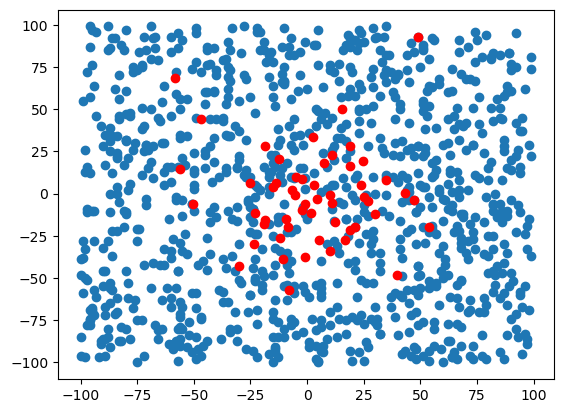

In [443]:
if __name__ == "__main__":
    N = 1000 # number of vectors
    dim = 125 # vector dimension
    k = 54 # number of clusters
    vectors = np.random.randint(-100, 100, size=(N,dim))
    reps = np.random.choice(vectors.shape[0], k, replace=False)
    reps = vectors[reps]
    iterations = 30
    instance = KMeansCluster(vectors, reps, k)
    plt.scatter(vectors[:, 0], vectors[:, 1])
    for _ in range(iterations):
        instance.compute_new_reps()
    plt.scatter(instance.cluster_reps[:, 0], instance.cluster_reps[:, 1], c="r")